# Lending Club Capstone

**Objective:** You are a data scientist of a start-up investment firm, which plans to invest in the loans of Lending Club.
- Conduct Research and Business Reports to Investigate the potential to invest in Lending Club loans.
- Use Machine Learning to select/construct loan portfolios with superb return-risk profiles.
- Find ways to scale up the portfolios (called portfolio capacity) preserving performance.

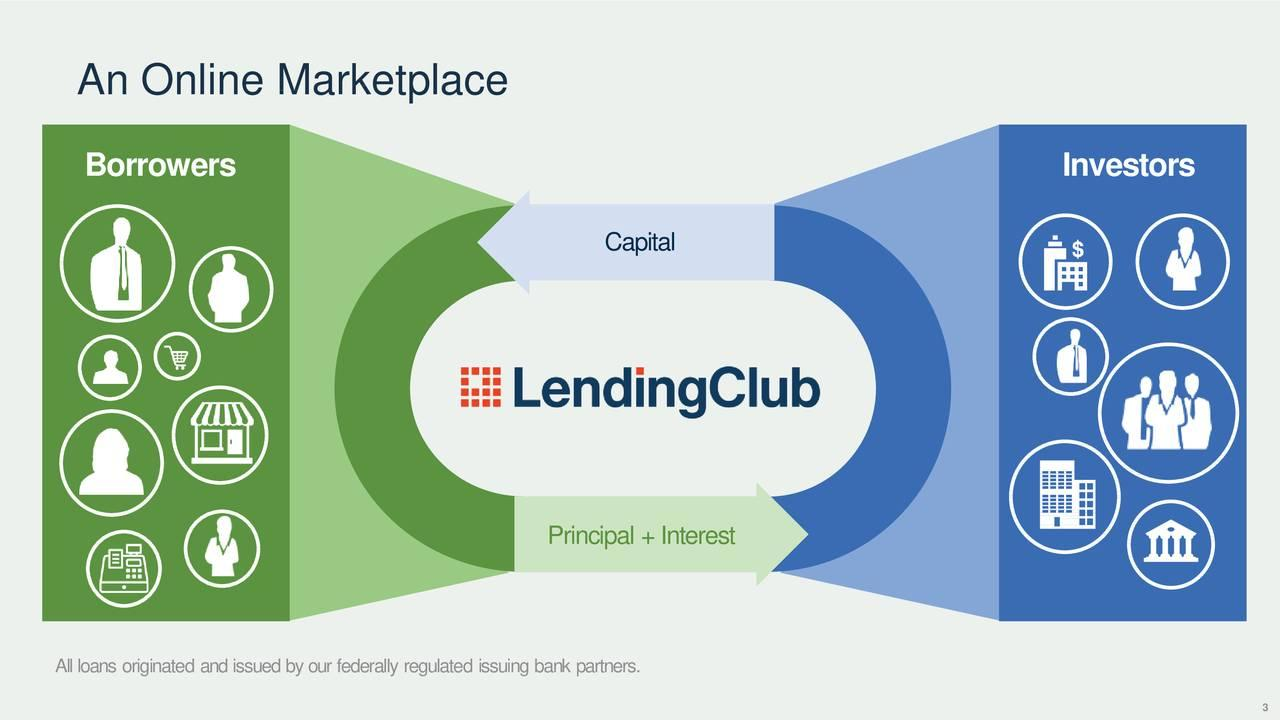

# 1. How does Lending Club compete with the traditional banks? What are the differences in their business models?
- As a lender, why do they get attracted to Lending Club instead of the alternatives in traditional banking
industry?
- As a borrower, how are the loan terms of Lending Club attractive to them?

Lending Club is a peer-to-peer company(P2P) headquartered in San Francisco, California. P2P lending is the practice of lending money to individuals or businessses through online services that match lenders with borrowers. Because their services are online, this allows for these companies to operate at a lower overhead or costs, and thus providing their services more cheaply than traditional financial institutions. This process allows for lenders to earn a higher returns compared to savings and investment products offered by traditional banks, while borrowers can borrow money at lower interest rates.

For Lending Club, and most other P2P lending companies, they make money through a origination and service fees. 

## 2. Important Vocabulary

**FICO:** 
The FICO score was first introduced in 1989 by Fair, Isaac, and Company (FICO). The FICO model is used by the vast majority of banks and credit grantors and is based on consumer credit files of the three national credit bureaus: Experian, Equifax, and TransUnion. Therefore, FICO scores can vary depending on which bureau provides the information to FICO to generate the score. The exact formulas are kept secret, however, FICO has discoled the following components: 
- Payment History
- Length of Credit History ("time in file")
- Types of Credit Used (installement, revolving, consumer finance, and mortgage)
- Recent seraches for Credit (when consumer apply for a credit card or a loan). 

**Installment Credit vs. Revolving Credit:**
- **Installment Credit**: Borrowers repay installment credit loans with scheduled, periodic payments. This type of credit involves the gradual reduction of principal and eventual full repayment, ending the credit cycle (Ex: Mortgage).
- **Revolving Credit**: Revolving credit allows borrowers to spend the borrowed money, repay it, and spend it again. The lender advances them a set credit limit that can be used all at once or in part (Ex: Credit Card).

**Installment and Amortization**:
A loan is taken where the principal (money originally borrowed) is paid down over the life of the loan according to an *amortization schedule*, typically throguh equal payments. An **installment** is usually a monthly payment that includes pricipal repayment and interest. **Amortization** is the rate at which the installments are extinguishing the debt/principal. Amortization shorten the average duration of the loan money.
   - *Amortization Schedule*: A complete table of periodic loan payments, showing the amount of pricipal and the amount of interest that comprise each payment until the loan is paid off a the end of its term. Each periodic payment is the same amount in total for each period. 

    
**Prepayment Risk:** 
Risk involved with the premature return of principal on a fixed-income security. This risk is held by the lenders since they wouldn't be collecting as much interest if the borrower prepays their loan. Through Lending Club, borrowers may prepay their loans at any time, in whole or in part, without penalty; Lenders get a percentage of the servicing fee.

**In the dataset, a loan is labeled either:**
- Fully Paid: Fully paid off loan
- Current: 
- Late: Payment was sent after the due date or grace period.
- Grace Period: A period of time creditors give borrowers to make their payments before incurring a late charge or risk defaulting on the loan.
- Default: Failure to make required interest or principal repayments on a loan.
- Charge-off: Lender has written the account off as a loan, and the account is closed to future charges. Having a charge-off can mean serious repercussions on credit history and future borrowing ability.

**Loan Default vs. Loand Delinquent:**
Delinquency means you are behind on payments. Once you are delinquent for a certain period of time (usually 9 months), your lender will declare the loan to be in default.

**Loan Settlement:**
Agreement between a lender and borrower wherein the loan is 'settled' by repaying only a part of the loan. This option is only available if the borrower has a genuine reason for being unable to repay such as a serious injury, medical emergencies, loss of a job, etc.

**Loan Collection:**
Loan collection is the process of purusing payments of debts owed by individuals or businesses. An orginization that specializes in debt collection is known as a collection agency or debt collector.

**Types of risks in investing in Lending Club Loans:**
- Inflation Risk: Inflation eats into real returns, but it's a risk all investments face. Duration.
- Fee Risk: Current management fee is 1%, but could go up or down.
- Marketplace Risk: Lending Club could go bankrupt, in which case it may take time to get your loans back.
- Callable Risk: Loans can be paid off early.
- Liquidity Risk: You can't access your money until the loan is paid in full. You can sell your loan on the secondary market, usually at a discount.
- Economic Risk: Could go through another financial crisis, where defaults rise.


### Pros and Cons of Lending Club

Pros:
- Diversification: You don't want to have all your money in one investment and Lending Club makes it easy to diversify your money across multiple notes.
- Wide Selection: Easily filter and choose investments by loan type, credit score, purpose of loan, etc
- Automated Investing: If you don't have the time or know-how, let Lending Club do the investing for your based on your own parameters
- Low minimum per note: Investors can invest as little as 25 dollars in each note.

Cons:
- Illiquidity: If you want to take money out, you haveto wait until each loan comes due.
- Taxed at Ordinary Income
- 1% Annual Fee: Lending club charges 1% annually per note you own within the marketplace.
- Unsecured Debt: Unlike an auto or home loan, this debt is unsecured. Lending Club cannot collect against an asset if ithe borrower defaults.


### 3. Tasks